<a href="https://colab.research.google.com/github/dayaniravi123/Machine-Learning-Projects/blob/main/Heart_Failure_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
## Import all libraries here

import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.regularizers import L1L2
from sklearn.preprocessing import OneHotEncoder


In [2]:
## Load dataset from .csv file of google drive 

dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning - Tensorflow /Heart_Attact_Prediction/heart.csv')

dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
## print all the columns of dataset

dataset.columns



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

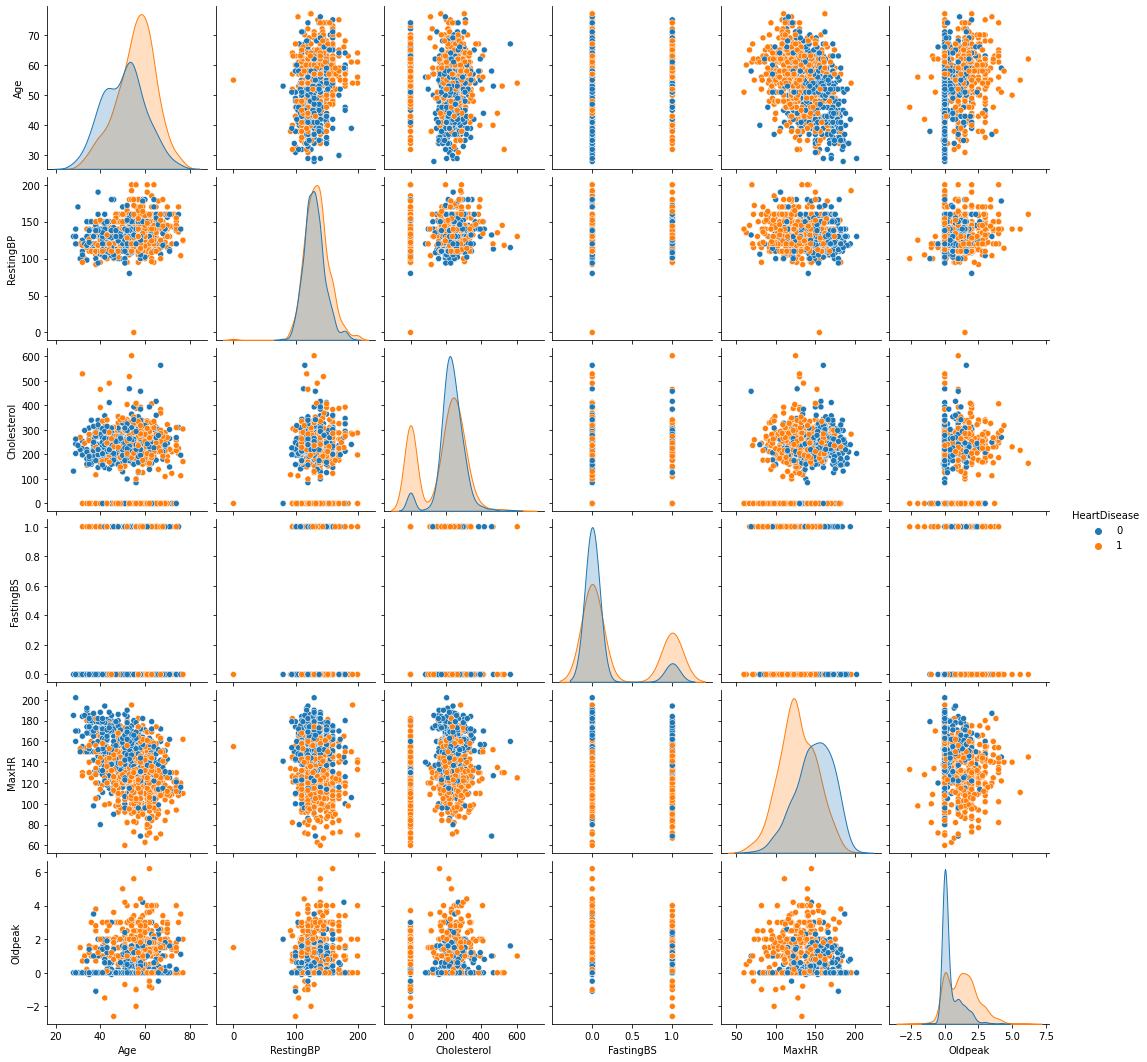

In [4]:
## visulize the dataset for preprocessing

sns.pairplot(dataset, hue="HeartDisease")

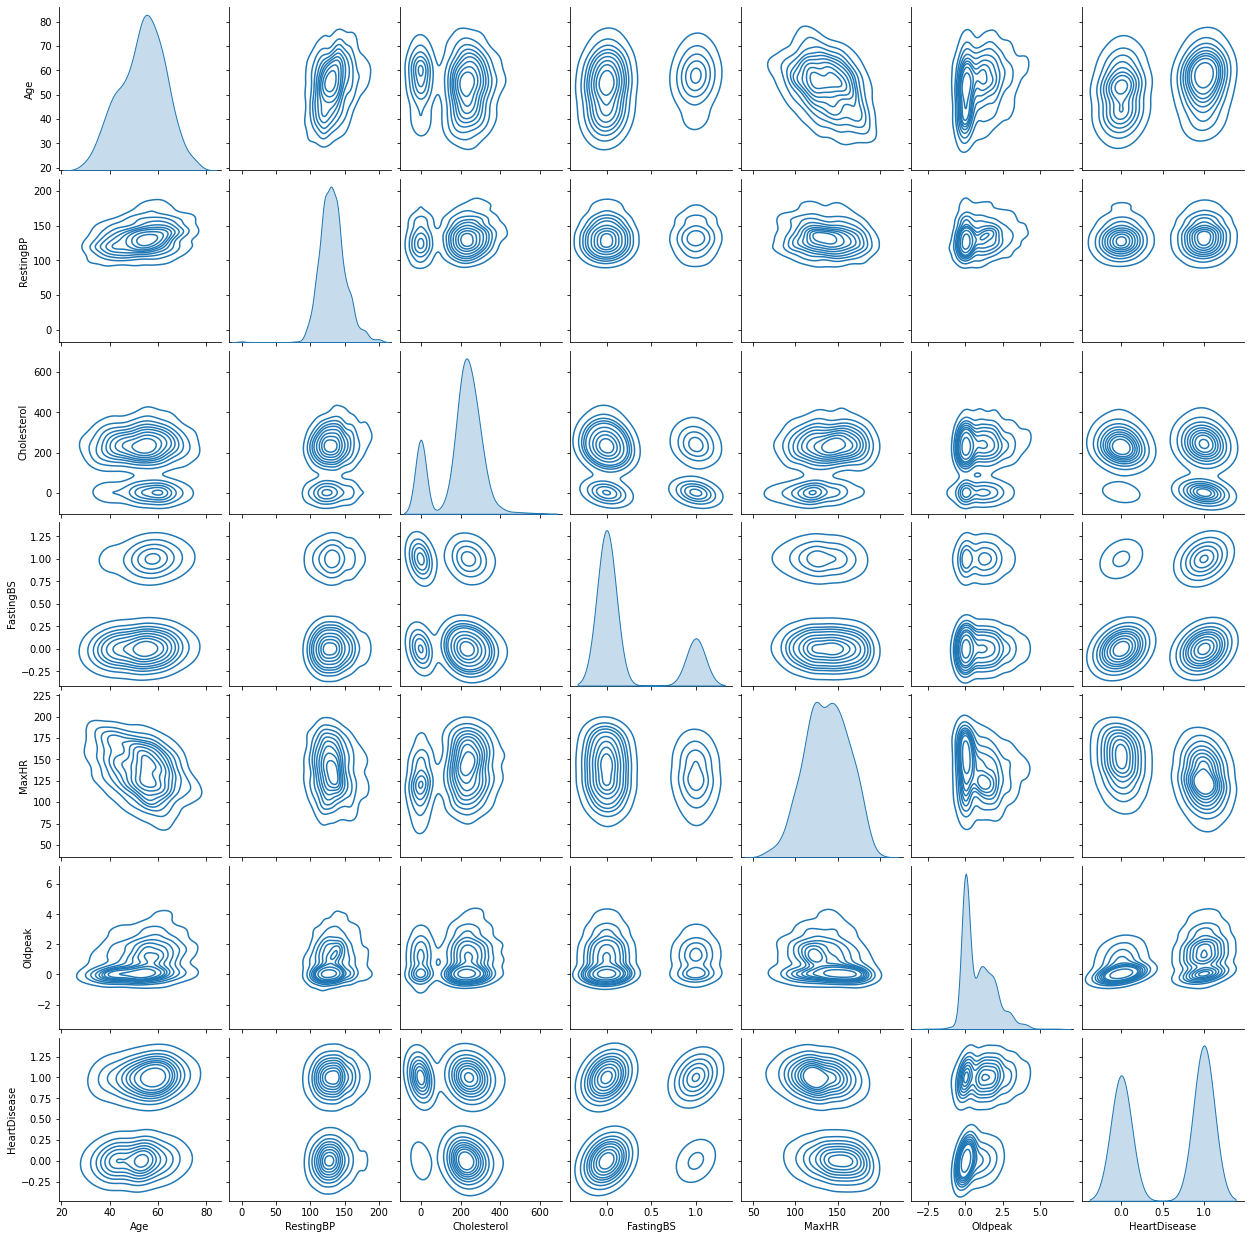

In [ ]:
## Implement pairplot which shows data distribution

sns.pairplot(dataset, kind="kde")

In [87]:
## Encoding all the categorical features

encoder = preprocessing.OrdinalEncoder()


dataset.Sex = dataset.Sex.astype('category').cat.codes
dataset.ChestPainType = dataset.ChestPainType.astype('category').cat.codes
dataset.RestingECG = dataset.RestingECG.astype('category').cat.codes
dataset.ExerciseAngina = dataset.ExerciseAngina.astype('category').cat.codes
dataset.ST_Slope = dataset.ST_Slope.astype('category').cat.codes
dataset.HeartDisease = dataset.HeartDisease.astype('category').cat.codes

In [88]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


(array([193.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 725.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

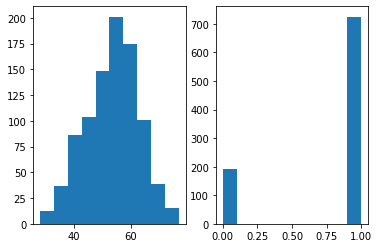

In [ ]:
## Plot multiple histogram in single row

## first Row
plt.subplot(1,2,1)
plt.hist(dataset['Age'])

plt.subplot(1,2,2)
plt.hist(dataset['Sex'])



(array([  1.,   0.,   0.,   0.,  12., 148., 430., 234.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

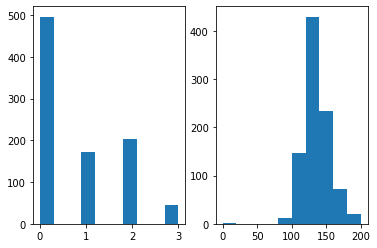

In [ ]:
## second row

plt.subplot(1,2,1)
plt.hist(dataset['ChestPainType'])

plt.subplot(1,2,2)
plt.hist(dataset['RestingBP'])



(array([704.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 214.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

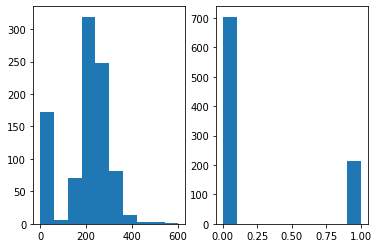

In [ ]:
## third row

plt.subplot(1,2,1)
plt.hist(dataset['Cholesterol'])

plt.subplot(1,2,2)
plt.hist(dataset['FastingBS'])




(array([  9.,  18.,  62., 113., 192., 175., 148., 132.,  61.,   8.]),
 array([ 60. ,  74.2,  88.4, 102.6, 116.8, 131. , 145.2, 159.4, 173.6,
        187.8, 202. ]),
 <a list of 10 Patch objects>)

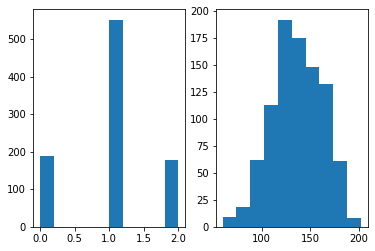

In [ ]:
## Fourth row

plt.subplot(1,2,1)
plt.hist(dataset['RestingECG'])

plt.subplot(1,2,2)
plt.hist(dataset['MaxHR'])




(array([ 63.,   0.,   0.,   0.,   0., 460.,   0.,   0.,   0., 395.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

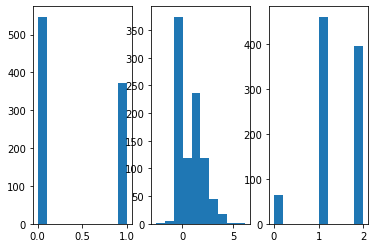

In [ ]:

## Fifth row

plt.subplot(1,3,1)
plt.hist(dataset['ExerciseAngina'])

plt.subplot(1,3,2)
plt.hist(dataset['Oldpeak'])

plt.subplot(1,3,3)
plt.hist(dataset['ST_Slope'])

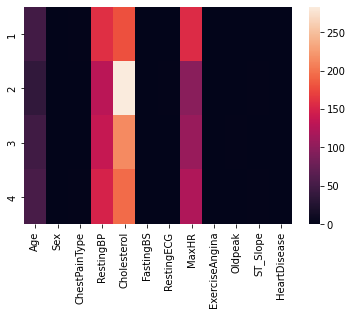

In [ ]:
## Implement Heat Map of given dataset

sns.heatmap(dataset.iloc[1:5])


In [89]:
## Split dataset into training and testing dataset


X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:11], dataset.iloc[:, 11], test_size = 0.3, random_state = 2)


In [107]:
## Define model for classification problem 

Model = tf.keras.models.Sequential([
    layers.Normalization(axis = -1),
    layers.Dense(1, kernel_regularizer = L1L2(l1=0.0, l2=0.1),input_dim = 11, activation='sigmoid')
    
])

In [112]:
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [115]:
history = Model.fit(X_train, y_train, epochs = 150, validation_split= 0.2)
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

#model = tf.estimator.LinearClassifier()



Epoch 1/150
17/17 [==============================] - 0s 14ms/step - loss: 19.7079 - accuracy: 0.6901 - val_loss: 18.2566 - val_accuracy: 0.7132
Epoch 2/150
17/17 [==============================] - 0s 6ms/step - loss: 19.6807 - accuracy: 0.6901 - val_loss: 18.2301 - val_accuracy: 0.7132
Epoch 3/150
17/17 [==============================] - 0s 8ms/step - loss: 19.6667 - accuracy: 0.6842 - val_loss: 18.3400 - val_accuracy: 0.7287
Epoch 4/150
17/17 [==============================] - 0s 6ms/step - loss: 19.6597 - accuracy: 0.6842 - val_loss: 18.2742 - val_accuracy: 0.7287
Epoch 5/150
17/17 [==============================] - 0s 6ms/step - loss: 19.6231 - accuracy: 0.6881 - val_loss: 18.2387 - val_accuracy: 0.7209
Epoch 6/150
17/17 [==============================] - 0s 7ms/step - loss: 19.5700 - accuracy: 0.6901 - val_loss: 18.0985 - val_accuracy: 0.7209
Epoch 7/150
17/17 [==============================] - 0s 7ms/step - loss: 19.5540 - accuracy: 0.6862 - val_loss: 18.0709 - val_accuracy: 0.720

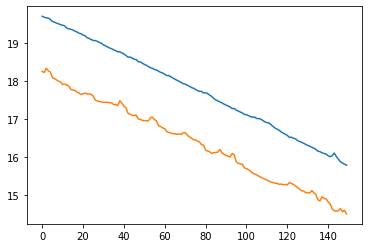

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [130]:
## Apply one hot encoding on given dataset


